In [3]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
#file_id = '1J05tsCBwdhEwkXygcbpKNztsXA6qErPC'
#downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [4]:
!pip install twitterscraper
!pip install vaderSentiment
!pip install langdetect

     |████████████████████████████████| 92kB 4.5MB/s 
  Created wheel for twitterscraper: filename=twitterscraper-1.6.1-cp36-none-any.whl size=11349 sha256=89d9f5f305e08ed86531e1afc9b46831247402ff8433eb404ea038acad8ce706
  Stored in directory: /root/.cache/pip/wheels/1a/50/a0/808fd6df0ac14c168b73874056a1ca52e4d88c0c1ecedd4e48
Successfully built twitterscraper
     |████████████████████████████████| 133kB 7.4MB/s 
     |████████████████████████████████| 983kB 8.1MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=bd51b4ef84aa0556f376fc1f3a8ad6fa7a7d087dbcadab013090da3d92b66cc0
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [5]:
#Importing the relevent libraries
import pandas as pd 
import datetime as dt 
from twitterscraper import query_tweets
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from langdetect import detect 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
begin_date = dt.date(2018,1,1)
end_date = dt.date(2020,3,26)
limit = 100000
lang = 'english'


In [7]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data/
#!cat '/gdrive/My Drive/Morgan Stanley Project/Data and Notebook/pretty_ms_tweets.json'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive/
/gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data


In [ ]:
#tweets = query_tweets("morganstanley", begindate = begin_date, enddate = end_date, limit = limit, lang = lang)


In [8]:
#Transforming it into a dataframe
#df = pd.DataFrame(t.__dict__ for t in tweets)
#Saving a file
#df.to_csv('TwitterData.csv')

In [9]:
df = pd.read_json('pretty_ml_tweets_feedback.json')
#df_sample = pd.read_csv('TwitterData.csv')



In [10]:
#Sentiment Analysis
#Vader Sentiment

In [11]:
analyzer = SentimentIntensityAnalyzer()

In [12]:
sentiment = df['text'].apply(lambda x: analyzer.polarity_scores(x))

In [13]:
#Inserting the sentiment into the dataframe
df = pd.concat([df, sentiment.apply(pd.Series)],1)

In [14]:
#df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [15]:
df['date'] = df['timestamp'].apply(lambda x: x.date())

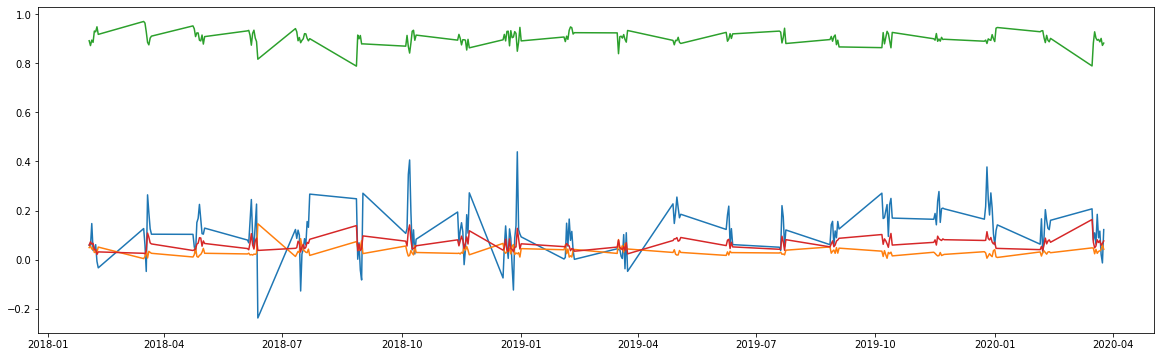

In [16]:
#Plotting the change in sentiment over time
plt.figure(figsize = (20,6))
plt.plot(df.groupby('date').mean()['compound'].index, df.groupby('date').mean()['compound'].values, label = 'com')

plt.plot(df.groupby('date').mean()['neg'].index, df.groupby('date').mean()['neg'].values)
plt.plot(df.groupby('date').mean()['neu'].index, df.groupby('date').mean()['neu'].values)
plt.plot(df.groupby('date').mean()['pos'].index, df.groupby('date').mean()['pos'].values)

In [17]:
df['text'].iloc[0]
#As we can see, several of the tweets captures donot refer to morgan stanley. Hence we need to filter out these tweets

'Taxpayer money was used to subsidize a string of finance mergers, from the Chase-Bear Stearns deal to the Wells Fargo\xad Wachovia merger to Bank of America’s acquisition of Merrill Lynch.'

In [18]:
Filter = df['text'].apply(lambda x: 'jp' in x.lower())
df_filter = df[Filter]
df_filter.shape
df_filter['text'].iloc[0]

'Segundo a Merrill Lynch, o percentual de IPOs que não geram lucro atingiu o pico da Bolha de Tecnologia: pic.twitter.com/6968c6JpWr'

Text(0, 0.5, 'Sentiment')

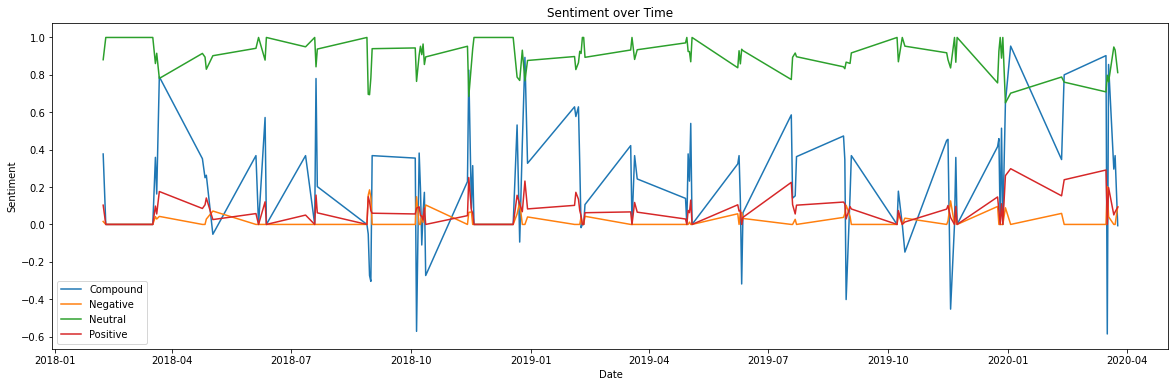

In [19]:
plt.figure(figsize = (20,6))
plt.plot(df_filter.groupby('date').mean()['compound'].index, df_filter.groupby('date').mean()['compound'].values, label = 'Compound')
plt.plot(df_filter.groupby('date').mean()['neg'].index, df_filter.groupby('date').mean()['neg'].values, label = 'Negative')
plt.plot(df_filter.groupby('date').mean()['neu'].index, df_filter.groupby('date').mean()['neu'].values, label = 'Neutral')
plt.plot(df_filter.groupby('date').mean()['pos'].index, df_filter.groupby('date').mean()['pos'].values, label = 'Positive')

plt.legend(loc = 'best')
plt.title('Sentiment over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment')

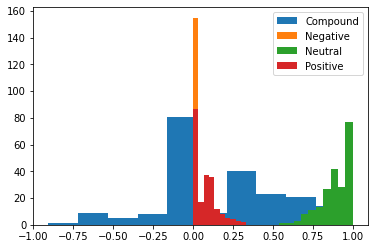

In [20]:

plt.hist(df_filter['compound'].values, label = 'Compound')
plt.hist(df_filter['neg'].values, label = 'Negative')
plt.hist(df_filter['neu'].values, label = 'Neutral')
plt.hist(df_filter['pos'].values, label = 'Positive')

plt.legend(loc = 'best')

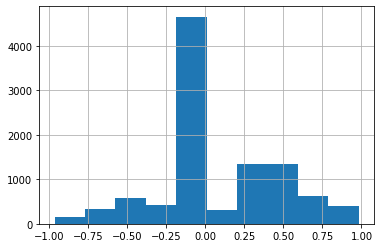

In [21]:
df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [22]:
df.iloc[:,-4:-1]

,neu,pos,compound
0,0.935,0.065,0.2500
1,0.866,0.134,0.5423
2,0.871,0.129,0.5106
3,1.000,0.000,0.0000
4,0.872,0.064,0.0000
...,...,...,...
10172,0.936,0.064,0.3818
10173,1.000,0.000,0.0000
10174,1.000,0.000,0.0000
10175,0.847,0.153,0.5574


In [23]:
#Importing Various twitter data
# all JP files

#Feedback
df = pd.read_json('pretty_ml_tweets_feedback.json')


In [24]:
#LDAVIS
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

     |████████████████████████████████| 1.6MB 8.2MB/s 
     |████████████████████████████████| 552kB 41.1MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=ad205464cf4c1fdee948af2e06913703b139db9c203a4c03dfd45774529cd0cb
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=733a90ce585de42946d7c80bdd994976371732a69ed5969226eccc77140b4a8d
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [25]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [26]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)

dtm_tf = tf_vectorizer.fit_transform(df['text'].values)
print(dtm_tf.shape)

(10177, 1968)


In [27]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

In [28]:
#dtm_tfidf = tfidf_vectorizer.fit_transform(df['text'].values)
#lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
#lda_tfidf.fit(dtm_tfidf)
#pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

In [29]:
sentiment_wm = df['text'].apply(lambda x: analyzer.polarity_scores(x))
df = pd.concat([df, sentiment_wm.apply(pd.Series)],1)

In [30]:
df.head()

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,neg,neu,pos,compound
0,False,[],[],False,True,2,[],1183880663566389248,0,"[{'screen_name': 'AjaSF', 'user_id': '46658899...",0,AjaSF,Taxpayer money was used to subsidize a string ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-10-14 23:48:48,2019-10-14 23:48:48,1183892442258558976,/AjaSF/status/1183892442258558977,46658899,Eincasso Picasstein 🇨🇱 🇺🇸 🏴,,0.000,0.935,0.065,0.2500
1,False,[],[],False,False,0,[],,0,[],0,GoldmanSachBOT,General Motors Co. (GM) surprised the market w...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-10-14 23:23:46,2019-10-14 23:23:46,1183886143433203712,/GoldmanSachBOT/status/1183886143433203719,1119063948689596416,EquityMarketPredictor,,0.000,0.866,0.134,0.5423
2,False,[],[],False,False,0,[],,0,[],0,GoldmanSachBOT,Public Service Enterprise Group (PEG) surprise...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-10-14 22:53:28,2019-10-14 22:53:28,1183878518054240256,/GoldmanSachBOT/status/1183878518054240257,1119063948689596416,EquityMarketPredictor,,0.000,0.871,0.129,0.5106
3,True,[],[https://pbs.twimg.com/media/EG32WiPWwAA8Fos.png],False,False,0,[],,0,[],1,ezints,Selon le modèle de Bank of America Merrill Lyn...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-10-14 22:32:08,2019-10-14 22:32:08,1183873147826790400,/ezints/status/1183873147826790400,319264607,Ezints,,0.000,1.000,0.000,0.0000
4,False,[],[],False,False,0,[],,0,[],0,GoldmanSachBOT,"Axon Enterprise, Inc. (AAXN) surprised the mar...","<p class=""TweetTextSize js-tweet-text tweet-te...",2019-10-14 22:12:32,2019-10-14 22:12:32,1183868214150909952,/GoldmanSachBOT/status/1183868214150909952,1119063948689596416,EquityMarketPredictor,,0.064,0.872,0.064,0.0000


In [31]:
df_pos = df[df['compound'] >= 0.05]
df_neg = df[df['compound'] <= -0.05]
df_neu = df[( df['compound'] < 0.05 ) & ( df['compound'] > -0.05 )]


In [32]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_pos['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.338260  0.062122       1        1  14.808000
0      0.147128  0.006944       2        1  14.346311
5      0.121727 -0.099547       3        1  12.237880
2      0.149899  0.080286       4        1  10.778693
7      0.130990 -0.147516       5        1   9.817763
3     -0.126643 -0.038269       6        1   7.929415
9     -0.219336  0.055932       7        1   7.809622
4      0.148151  0.223395       8        1   7.585694
1      0.154247 -0.032114       9        1   7.470786
6     -0.167901 -0.111233      10        1   7.215836, topic_info=           Term        Freq       Total Category  logprob  loglift
140     changed  126.000000  126.000000  Default  30.0000  30.0000
676      result  125.000000  125.000000  Default  29.0000  29.0000
796   surprised  125.000000  125.000000  Default  28.0000  28.0000
649      rating  126.000000  126.000000  Default  27.0000  27.0000
279       exxon   43.000000   43.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
749      soared    7.477848   70.669049  Topic10  -4.7385   0.3828
670    reported    7.467130   70.854084  Topic10  -4.7399   0.3788
567  outperform    6.227716   60.627288  Topic10  -4.9214   0.3532
772       stock    5.659066   31.347329  Topic10  -5.0172   0.9170
723        sell    5.706599   52.057184  Topic10  -5.0088   0.4182

[543 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         8  0.980711       aapl
1         1  0.954446       aaxn
5         2  0.047932  according
5         3  0.575182  according
5         5  0.047932  according
...     ...       ...        ...
910       3  0.211339      years
910       4  0.126804      years
910       5  0.380411      years
910       6  0.042268      years
910      10  0.042268      years

[970 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 1, 6, 3, 8, 4, 10, 5, 2, 7])

In [33]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_neg['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.082873 -0.125900       1        1  15.216029
5      0.127957  0.068168       2        1  11.077800
2      0.136193 -0.055634       3        1  10.254532
1     -0.262384 -0.042318       4        1  10.230860
7      0.079266  0.033215       5        1   9.794201
8     -0.005374  0.332563       6        1   9.461323
4     -0.355015 -0.031598       7        1   9.243452
6      0.069061 -0.031028       8        1   8.924352
0      0.084813 -0.129194       9        1   8.340395
9      0.042609 -0.018274      10        1   7.457056, topic_info=          Term       Freq      Total Category  logprob  loglift
344     rating  51.000000  51.000000  Default  30.0000  30.0000
35         auf  25.000000  25.000000  Default  29.0000  29.0000
115       cuts  35.000000  35.000000  Default  28.0000  28.0000
410  surprised  30.000000  30.000000  Default  27.0000  27.0000
355     result  29.000000  29.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
23     america   5.265670  63.338824  Topic10  -4.2039   0.1087
98         com   5.374423  92.240258  Topic10  -4.1834  -0.2467
227      https   4.772436  76.867350  Topic10  -4.3022  -0.1832
226       http   4.670361  70.189594  Topic10  -4.3238  -0.1140
63        bofa   4.378218  43.059975  Topic10  -4.3884   0.3101

[456 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         7  0.830048       aaxn
1         6  0.923429  abgestuft
2         1  0.803786  according
2         3  0.133964  according
4         5  0.708979   accounts
...     ...       ...        ...
465       4  0.832243        xom
467       1  0.853424      years
467       8  0.077584      years
468       6  0.875992       york
469       6  0.870417       ziel

[726 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 3, 2, 8, 9, 5, 7, 1, 10])

In [34]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_neu['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.075132 -0.100053       1        1  15.176305
6     -0.078402 -0.078769       2        1  11.964393
8      0.387089 -0.140650       3        1  11.349889
7     -0.070094  0.017828       4        1  11.238669
4     -0.065373 -0.023934       5        1   9.846408
1     -0.002019 -0.003227       6        1   9.124825
9     -0.042860 -0.018988       7        1   8.443178
0     -0.069023  0.035631       8        1   7.851322
5     -0.084802 -0.057531       9        1   7.598755
2      0.100615  0.369693      10        1   7.406256, topic_info=         Term        Freq       Total Category  logprob  loglift
415   karauri  173.000000  173.000000  Default  30.0000  30.0000
417     kikan  165.000000  165.000000  Default  29.0000  29.0000
184      date  165.000000  165.000000  Default  28.0000  28.0000
495       net  176.000000  176.000000  Default  27.0000  27.0000
660       son   49.000000   49.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
307   general   11.179399   20.733897  Topic10  -4.3038   1.9851
156   company   10.677728   22.176598  Topic10  -4.3497   1.8720
10   advierte    6.285594    8.950603  Topic10  -4.8796   2.2494
321     group    6.781296   26.245189  Topic10  -4.8037   1.2495
248    espana    6.361213   12.624284  Topic10  -4.8677   1.9174

[506 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         8  0.935300       aapl
4         2  0.811309  according
4         4  0.162262  according
5         2  0.069962    account
5         4  0.069962    account
...     ...       ...        ...
777       6  0.741836        yat
777       8  0.197823        yat
781       2  0.832612      yield
781       8  0.104076      yield
783       8  0.875158       ziel

[739 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 7, 9, 8, 5, 2, 10, 1, 6, 3])

In [35]:
print(df_pos.shape)
print(df_neg.shape)
print(df_neu.shape)

(3983, 25)
(1766, 25)
(4428, 25)
